<a href="https://colab.research.google.com/github/Haritsmz/World_Happiness/blob/main/world_happiness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analisis Faktor-Faktor yang Mempengaruhi Tingkat Kebahagiaan Suatu Negara**

## **Import Library**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#import library yang dibutuhkan
import pandas as pd
import plotly as py
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np

## **Reading dataset**

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Dataset/world_happiness1.csv')

In [4]:
df

,country,happiness_score,gdp_per_capita,social_support,health_life_expectancy,freedom,generosity,perceptions_of_corruption,score_dystopia,dystopia_residual
0,Finland,7.804,10.792,0.969,71.150,0.961,-0.019,0.182,1.778,2.363
1,Denmark,7.586,10.962,0.954,71.250,0.934,0.134,0.196,1.778,2.084
2,Iceland,7.530,10.896,0.983,72.050,0.936,0.211,0.668,1.778,2.250
3,Israel,7.473,10.639,0.943,72.697,0.809,-0.023,0.708,1.778,2.691
4,Netherlands,7.403,10.942,0.930,71.550,0.887,0.213,0.379,1.778,2.110
...,...,...,...,...,...,...,...,...,...,...
132,Congo (Kinshasa),3.207,7.007,0.652,55.375,0.664,0.086,0.834,1.778,1.162
133,Zimbabwe,3.204,7.641,0.690,54.050,0.654,-0.046,0.766,1.778,0.905
134,Sierra Leone,3.138,7.394,0.555,54.900,0.660,0.105,0.858,1.778,1.221
135,Lebanon,2.392,9.478,0.530,66.149,0.474,-0.141,0.891,1.778,-0.110


## **Data Cleansing**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   country                    137 non-null    object 
 1   happiness_score            137 non-null    float64
 2   gdp_per_capita             137 non-null    float64
 3   social_support             137 non-null    float64
 4   health_life_expectancy     136 non-null    float64
 5   freedom                    137 non-null    float64
 6   generosity                 137 non-null    float64
 7   perceptions_of_corruption  137 non-null    float64
 8   score_dystopia             137 non-null    float64
 9   dystopia_residual          136 non-null    float64
dtypes: float64(9), object(1)
memory usage: 10.8+ KB


In [6]:
df.dropna()

,country,happiness_score,gdp_per_capita,social_support,health_life_expectancy,freedom,generosity,perceptions_of_corruption,score_dystopia,dystopia_residual
0,Finland,7.804,10.792,0.969,71.150,0.961,-0.019,0.182,1.778,2.363
1,Denmark,7.586,10.962,0.954,71.250,0.934,0.134,0.196,1.778,2.084
2,Iceland,7.530,10.896,0.983,72.050,0.936,0.211,0.668,1.778,2.250
3,Israel,7.473,10.639,0.943,72.697,0.809,-0.023,0.708,1.778,2.691
4,Netherlands,7.403,10.942,0.930,71.550,0.887,0.213,0.379,1.778,2.110
...,...,...,...,...,...,...,...,...,...,...
132,Congo (Kinshasa),3.207,7.007,0.652,55.375,0.664,0.086,0.834,1.778,1.162
133,Zimbabwe,3.204,7.641,0.690,54.050,0.654,-0.046,0.766,1.778,0.905
134,Sierra Leone,3.138,7.394,0.555,54.900,0.660,0.105,0.858,1.778,1.221
135,Lebanon,2.392,9.478,0.530,66.149,0.474,-0.141,0.891,1.778,-0.110


## **Exploratory Data Analysis**

In [7]:
# Mengurutkan data berdasarkan tingkat kebahagiaan
df_sorted = df.sort_values(by='happiness_score', ascending=False)

In [10]:
# Mengambil 10 data teratas negara yang tingkat kebahagiaannya tertinggi
df_top10 = df_sorted.head(10)

# Menampilkan hasil
df_top10[['country', 'happiness_score']]

,country,happiness_score
0,Finland,7.804
1,Denmark,7.586
2,Iceland,7.530
3,Israel,7.473
4,Netherlands,7.403
5,Sweden,7.395
6,Norway,7.315
7,Switzerland,7.240
8,Luxembourg,7.228
9,New Zealand,7.123


In [14]:
df_happiness = px.data.gapminder()
fig = px.bar(df_top10, x='country', y='happiness_score', labels={'y':'happiness_score'},
             hover_data=['country'],
             title='10 Happiest Country', color_discrete_sequence=['blue'])
fig

In [16]:
df_last10 = df.tail(10)

fig10 = px.bar(df_last10, x='country', y='happiness_score', labels={'y':'happiness_score'},
             hover_data=['country'],
             title='10 Unhappiest Country', color_discrete_sequence=['red'])
fig10

In [18]:
# Mengambil 10 data teratas negara yang tingkat gdp_per_capita nya tertinggi
df1_sorted = df.sort_values(by='gdp_per_capita', ascending=False)
df1_top10 = df1_sorted.head(10)

# Menampilkan hasil
df1_top10[['country', 'gdp_per_capita']]

,country,gdp_per_capita
8,Luxembourg,11.660
24,Singapore,11.571
13,Ireland,11.527
7,Switzerland,11.164
25,United Arab Emirates,11.145
6,Norway,11.088
14,United States,11.048
81,Hong Kong S.A.R. of China,10.966
1,Denmark,10.962
4,Netherlands,10.942


In [20]:
df_happiness = px.data.gapminder()
fig1 = px.bar(df1_top10, x='country', y='gdp_per_capita', labels={'y':'gdp_per_capita'},
             hover_data=['country'],
             title='10 country with highest gdp', color_discrete_sequence=['green'])
fig1

In [22]:
# Mengambil 10 data teratas negara yang tingkat social_support nya tertinggi
df2_sorted = df.sort_values(by='social_support', ascending=False)
df2_top10 = df2_sorted.head(10)

# Menampilkan hasil
df2_top10[['country', 'social_support']]

,country,social_support
2,Iceland,0.983
0,Finland,0.969
1,Denmark,0.954
28,Slovakia,0.953
17,Czechia,0.953
9,New Zealand,0.952
21,Slovenia,0.951
30,Estonia,0.946
50,Hungary,0.943
6,Norway,0.943


In [24]:
df_happiness = px.data.gapminder()
fig2 = px.bar(df2_top10, x='country', y='social_support', labels={'y':'social_support'},
             hover_data=['country'],
             title='10 country with highest social support', color_discrete_sequence=['lightblue'])
fig2

In [25]:
# Mengambil 10 data teratas negara yang tingkat health_life_expectancy nya tertinggi
df3_sorted = df.sort_values(by='health_life_expectancy', ascending=False)
df3_top10 = df3_sorted.head(10)

# Menampilkan hasil
df3_top10[['country', 'health_life_expectancy']]

,country,health_life_expectancy
81,Hong Kong S.A.R. of China,77.280
46,Japan,74.349
24,Singapore,73.800
56,South Korea,73.650
7,Switzerland,72.900
45,Cyprus,72.802
3,Israel,72.697
31,Spain,72.350
20,France,72.300
5,Sweden,72.150


In [27]:
df_happiness = px.data.gapminder()
fig3 = px.bar(df3_top10, x='country', y='health_life_expectancy', labels={'y':'health_life_expectancy'},
             hover_data=['country'],
             title='10 country with highest health life', color_discrete_sequence=['orange'])
fig3

In [28]:
# Mengambil 10 data teratas negara yang tingkat freedom nya tertinggi
df4_sorted = df.sort_values(by='freedom', ascending=False)
df4_top10 = df4_sorted.head(10)

# Menampilkan hasil
df4_top10[['country', 'freedom']]

,country,freedom
0,Finland,0.961
114,Cambodia,0.958
5,Sweden,0.948
6,Norway,0.947
41,Bahrain,0.944
25,United Arab Emirates,0.942
64,Vietnam,0.939
53,Uzbekistan,0.938
2,Iceland,0.936
61,Kyrgyzstan,0.934


In [30]:
df_happiness = px.data.gapminder()
fig4 = px.bar(df4_top10, x='country', y='freedom', labels={'y':'freedom'},
             hover_data=['country'],
             title='10 country with highest freedom', color_discrete_sequence=['pink'])
fig4

In [31]:
# Mengambil 5 data teratas negara yang tingkat generosity nya tertinggi
df5_sorted = df.sort_values(by='generosity', ascending=False)
df5_top10 = df5_sorted.head(10)

# Menampilkan hasil
df5_top10[['country', 'generosity']]

,country,generosity
83,Indonesia,0.531
116,Myanmar,0.491
118,Gambia,0.364
59,Thailand,0.289
110,Kenya,0.288
123,Ethiopia,0.273
33,Kosovo,0.259
18,United Kingdom,0.253
91,Ukraine,0.240
53,Uzbekistan,0.230


In [34]:
df_happiness = px.data.gapminder()
fig5 = px.bar(df5_top10, x='country', y='generosity', labels={'y':'generosity'},
             hover_data=['country'],
             title='10 country with highest generosity', color_discrete_sequence=['lightcoral'])
fig5

In [35]:
# Mengambil 5 data teratas negara yang tingkat perception of corruption nya tertinggi
df6_sorted = df.sort_values(by='perceptions_of_corruption', ascending=False)
df6_top10 = df6_sorted.head(10)

# Menampilkan hasil
df6_top10[['country', 'perceptions_of_corruption']]

,country,perceptions_of_corruption
23,Romania,0.929
47,Croatia,0.925
70,Bosnia and Herzegovina,0.918
94,Nigeria,0.911
76,Bulgaria,0.911
59,Thailand,0.910
109,Tunisia,0.907
91,Ukraine,0.907
61,Kyrgyzstan,0.904
86,North Macedonia,0.902


In [37]:
df_happiness = px.data.gapminder()
fig6 = px.bar(df6_top10, x='country', y='perceptions_of_corruption', labels={'y':'perceptions_of_corruption'},
             hover_data=['country'],
             title='10 country with highest perceptions of corruption', color_discrete_sequence=['darkred'])
fig6

In [38]:
# Menghitung korelasi antara kolom 'happiness_score' dan kolom lainnya
correlations = df[['gdp_per_capita', 'social_support', 'health_life_expectancy', 'freedom', 'generosity', 'perceptions_of_corruption']].corrwith(df['happiness_score'])

# Mengurutkan korelasi secara descending
sorted_correlations = correlations.sort_values(ascending=False)

# Menampilkan hasil
sorted_correlations

social_support               0.834532
gdp_per_capita               0.784367
health_life_expectancy       0.746928
freedom                      0.662924
generosity                   0.044082
perceptions_of_corruption   -0.471911
dtype: float64

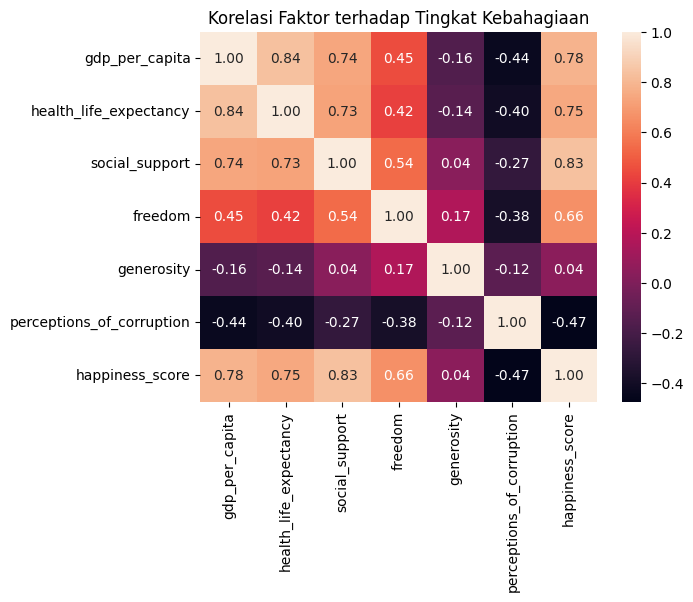

In [39]:
correlations = df[['gdp_per_capita', 'health_life_expectancy', 'social_support', 'freedom', 'generosity', 'perceptions_of_corruption', 'happiness_score']].corr()
sns.heatmap(correlations, annot=True, fmt=".2f")
plt.title('Korelasi Faktor terhadap Tingkat Kebahagiaan')
plt.show()